In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv('https://raw.githubusercontent.com/kislay960/Data-Science-Practice/master/Linear_X_Train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/kislay960/Data-Science-Practice/master/Linear_Y_Train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/kislay960/Data-Science-Practice/master/Linear_X_Test.csv')

In [5]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values

In [6]:
x_train.std(),x_train.mean()

(0.9920801322508517, -0.03779466168006855)

In [7]:
#Normalization
x_train = (x_train - x_train.mean())/x_train.std()
x_train.std(),x_train.mean()

(1.0, 3.789561257387201e-18)

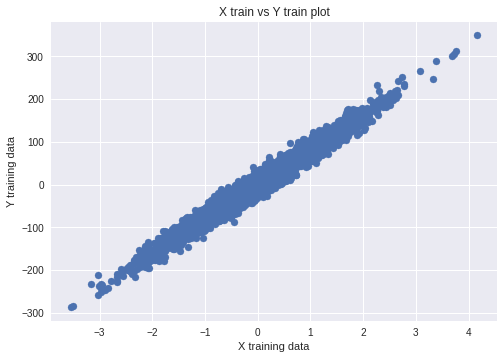

In [10]:
plt.style.use('seaborn')
plt.scatter(x_train,y_train)
plt.xlabel('X training data')
plt.ylabel('Y training data')
plt.title('X train vs Y train plot')
plt.show()

In [12]:
x_train.shape[0]

3750

In [15]:
def hypothesis(x,theta):
  return (theta[0] + theta[1]*x)

def gradient(X,Y,theta):
  grad = np.zeros((2,))
  for i in range(x_train.shape[0]):
    grad[0] += hypothesis(x_train[i],theta) - y_train[i]
    grad[1] += (hypothesis(x_train[i],theta) - y_train[i])*x_train[i]
  return grad/x_train.shape[0]

def error(X,Y,theta):
  m = x_train.shape[0]
  total_error = 0.0
  for i in range(m):
    y_ = hypothesis(x_train[i],theta)
    total_error += (y_ - y_train[i])**2    
  return (total_error/m)

def gradientDescent(X,Y,epochs=100,learning_rate=0.1):
  theta = np.zeros((2,))
  error_list = []
  theta_list = []
  for i in range(epochs):
    grad = gradient(X,Y,theta)
    e = error(X,Y,theta)[0]
    theta[0] = theta[0] - learning_rate*grad[0]
    theta[1] = theta[1] - learning_rate*grad[1]
    theta_list.append((theta[0],theta[1]))
    error_list.append(e)
  return theta,error_list,theta_list

In [16]:
theta,error_list,theta_list = gradientDescent(x_train, y_train)

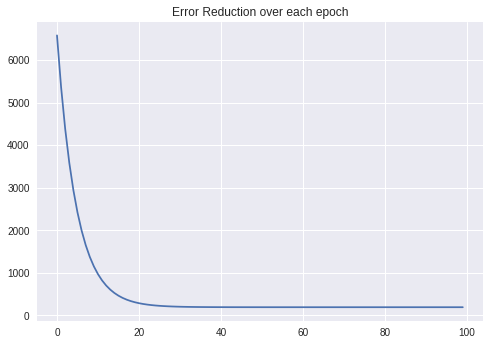

In [20]:
plt.plot(error_list)
plt.title("Error Reduction over each epoch")
plt.show()

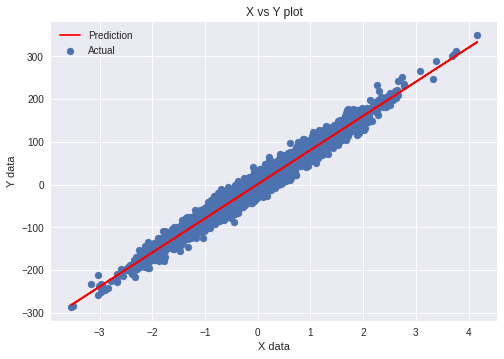

In [23]:
plt.scatter(x_train,y_train,label='Actual')
plt.plot(x_train,hypothesis(x_train,theta),color='red',label='Prediction')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.title('X vs Y plot')
plt.legend()
plt.show()

In [26]:
df = pd.DataFrame(hypothesis(x_train,theta),columns=['y'])
df.to_csv('Y_pred.csv',index=False)

**On submission we got an accuracy of 97%**